In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("framingham.csv")
display(df)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Preprocessing Data

In [3]:
# "education" showed -ve correlation, with target label
# "male" was shown to be IN SIGNIFICANT, during T TEst(based on p-value)
# "diabetes" was shown to be IN SIGNIFICANT, during T TEst(based on p-value)
# "currentSmoker" fails in chi-square test
df=df.drop(axis=1,labels=["male","education","diabetes","currentSmoker"])
df

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
0,39,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,0.0,0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1.0,0.0,0,1,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,51,43.0,0.0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,48,20.0,NaN,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,44,15.0,0.0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
#To understand , which attribute has how many ("NULL" or NaN) values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 4238 non-null   int64  
 1   cigsPerDay          4209 non-null   float64
 2   BPMeds              4185 non-null   float64
 3   prevalentStroke     4238 non-null   int64  
 4   prevalentHyp        4238 non-null   int64  
 5   totChol             4188 non-null   float64
 6   sysBP               4238 non-null   float64
 7   diaBP               4238 non-null   float64
 8   BMI                 4219 non-null   float64
 9   heartRate           4237 non-null   float64
 10  glucose             3850 non-null   float64
 11  POSSIBILITY OF CVD  4238 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 397.4 KB


In [5]:
# each column has 4238 entries.
# for attribute "glucose" , there are only 3850 "not-NULL" entries
#df.fillna?


In [6]:
# for categorical attributes, we replace Nan with most frequent attribute
#for continous attributes,we replace Nan with mean .

#for continous attributes--->replace Nan with mean
df["cigsPerDay"]=df["cigsPerDay"].fillna(round(df["cigsPerDay"].mean()))
df["totChol"]=df["totChol"].fillna(round(df["totChol"].mean()))
df["BMI"]=df["BMI"].fillna(round(df["BMI"].mean(),2))
df["heartRate"]=df["heartRate"].fillna(round(df["heartRate"].mean()))
df["glucose"]=df["glucose"].fillna(round(df["glucose"].mean()))


#for categorical attributes-->replace Nan with most freq value
vall,freqq=np.unique(df["BPMeds"],return_counts=True)
#display(vall,freqq)
df["BPMeds"]=df["BPMeds"].fillna(vall[freqq.argmax()])

display(df)



,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
0,39,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,0.0,0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1.0,0.0,0,1,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,51,43.0,0.0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,48,20.0,0.0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,44,15.0,0.0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 4238 non-null   int64  
 1   cigsPerDay          4238 non-null   float64
 2   BPMeds              4238 non-null   float64
 3   prevalentStroke     4238 non-null   int64  
 4   prevalentHyp        4238 non-null   int64  
 5   totChol             4238 non-null   float64
 6   sysBP               4238 non-null   float64
 7   diaBP               4238 non-null   float64
 8   BMI                 4238 non-null   float64
 9   heartRate           4238 non-null   float64
 10  glucose             4238 non-null   float64
 11  POSSIBILITY OF CVD  4238 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 397.4 KB


In [8]:
#now all attributes, has all 4238 values present

In [9]:
#how to access a row, in a DataFrame object
#2nd row of df
df.loc[2]

age                    48.00
cigsPerDay             20.00
BPMeds                  0.00
prevalentStroke         0.00
prevalentHyp            0.00
totChol               245.00
sysBP                 127.50
diaBP                  80.00
BMI                    25.34
heartRate              75.00
glucose                70.00
POSSIBILITY OF CVD      0.00
Name: 2, dtype: float64

In [10]:
df.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'POSSIBILITY OF CVD'],
      dtype='object')

# Decison Tree Implementation

### step 0: preparing data

In [11]:
# random shuffling of data
#df=df.sample(frac=1)
#display(df)

#not doing this step, as data is already shuffled, as per dataset discription

In [12]:
# taking data , from the DataFrame object, to numpy object
data=df.values
print(data)
print(data.shape)
print(type(data))

[[ 39.   0.   0. ...  80.  77.   0.]
 [ 46.   0.   0. ...  95.  76.   0.]
 [ 48.  20.   0. ...  75.  70.   0.]
 ...
 [ 48.  20.   0. ...  84.  86.   0.]
 [ 44.  15.   0. ...  86.  82.   0.]
 [ 52.   0.   0. ...  80. 107.   0.]]
(4238, 12)
<class 'numpy.ndarray'>


In [13]:
#separating target label, from rest of the attributes
X=data[:,:-1]  
Y=data[:,-1]  # target label
print(X)
print(X.shape)
print(Y)
print(Y.shape)

[[ 39.     0.     0.   ...  26.97  80.    77.  ]
 [ 46.     0.     0.   ...  28.73  95.    76.  ]
 [ 48.    20.     0.   ...  25.34  75.    70.  ]
 ...
 [ 48.    20.     0.   ...  22.    84.    86.  ]
 [ 44.    15.     0.   ...  19.16  86.    82.  ]
 [ 52.     0.     0.   ...  21.47  80.   107.  ]]
(4238, 11)
[0. 0. 0. ... 0. 0. 0.]
(4238,)


### step 1: spliting data for training and testing

In [14]:
#performing split , to train,test data
split=0.7*X.shape[0]
print(split)
split=int(split)
print("split length:",split)
print()

X_train= X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]

print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_test:",Y_test.shape)

2966.6
split length: 2966

X_train: (2966, 11)
X_test: (1272, 11)
Y_train: (2966,)
Y_test: (1272,)


In [52]:
#separating target label, from rest of the attributes
# we will use only dataframe objects, in all our calculations, not np arrays
df_x_train=pd.DataFrame(data=X_train,columns=['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])
df_y_train=pd.DataFrame(data=Y_train,columns=["POSSIBILITY OF CVD"])  # target label
#now creating a data frame for training, testing
df_xy_train=pd.DataFrame(df[:split])
df_xy_test=pd.DataFrame(df[split:])
#make the index of df_xy_test to start from 0
df_xy_test=df_xy_test.reset_index(drop=True) 

display(df_x_train)
print(df_x_train.shape)
display(df_y_train)
print(df_y_train.shape)
print(type(df_x_train))
display(df_xy_train)
print(df_xy_train.shape)
display(df_xy_test)
print(df_xy_test.shape)

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48.0,20.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61.0,30.0,0.0,0.0,1.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46.0,23.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...
2961,52.0,0.0,0.0,0.0,1.0,258.0,177.0,111.0,30.38,80.0,270.0
2962,51.0,20.0,0.0,0.0,0.0,274.0,108.0,75.0,23.60,70.0,68.0
2963,49.0,0.0,0.0,0.0,0.0,228.0,124.0,72.0,21.18,74.0,88.0
2964,68.0,15.0,0.0,0.0,0.0,193.0,145.0,67.0,23.13,75.0,72.0


(2966, 11)


,POSSIBILITY OF CVD
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
2961,1.0
2962,0.0
2963,0.0
2964,1.0


(2966, 1)
<class 'pandas.core.frame.DataFrame'>


,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
0,39,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,0.0,0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2961,52,0.0,0.0,0,1,258.0,177.0,111.0,30.38,80.0,270.0,1
2962,51,20.0,0.0,0,0,274.0,108.0,75.0,23.60,70.0,68.0,0
2963,49,0.0,0.0,0,0,228.0,124.0,72.0,21.18,74.0,88.0,0
2964,68,15.0,0.0,0,0,193.0,145.0,67.0,23.13,75.0,72.0,1


(2966, 12)


,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
0,54,0.0,0.0,0,1,248.0,155.0,92.5,29.86,85.0,66.0,0
1,44,3.0,0.0,0,0,244.0,105.0,60.0,23.24,76.0,82.0,0
2,46,43.0,0.0,0,0,237.0,105.0,72.5,33.49,67.0,79.0,0
3,49,20.0,1.0,0,1,262.0,147.5,97.5,24.96,60.0,67.0,0
4,46,0.0,0.0,0,0,229.0,127.5,80.0,22.34,84.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1267,50,1.0,0.0,0,1,313.0,179.0,92.0,25.97,66.0,86.0,1
1268,51,43.0,0.0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
1269,48,20.0,0.0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
1270,44,15.0,0.0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


(1272, 12)


### step 2: Decision Tree implementation

In [40]:
#define entropy of a column
# entropy is a measure of "randomness"
def entropy(columnn):
    classes,freq=np.unique(columnn,return_counts=True)
    N=float(columnn.shape[0])
    
    ent=0.0
    for i in freq:
        p=i/N
        ent+=(-1.0*p*np.log2(p))
    
    return ent
    

In [41]:
# understanding how the func works with a example
eg=np.array([1,1,1,0,0,0])
print(eg.shape)
print(np.unique(eg,return_counts=True))
print("entropy =",entropy(eg))
print("entropy is max(entropy=1) when probability=0.5 for each class in a binary data")

(6,)
(array([0, 1]), array([3, 3]))
entropy = 1.0
entropy is max(entropy=1) when probability=0.5 for each class in a binary data


In [42]:
def divide_data(x_data,fkey,fval):
    """
    x_data: undivided data
    fkey: attribute ,whose values are to be considered for division
    fval: all rows, whose fkey>fval, copy to right node, otherwise left node
    """
    #to store all rows, whose value at fkey<=fval
    x_left=pd.DataFrame(data=[],columns=x_data.columns)
    #to store all rows, whose value at fkey>fval
    x_right=pd.DataFrame(data=[],columns=x_data.columns)
    
    for i in range(x_data.shape[0]):
        val=x_data[fkey].loc[i]
        if(val>fval):
            x_right=x_right.append(x_data.loc[i])
        else:
            x_left=x_left.append(x_data.loc[i])
    return x_left,x_right
            

In [43]:
#understanding how the func works
x_left,x_right=divide_data(df_x_train[:5],'age',50)
#0th column is age in X_train
print("undivided data=\n")
display(df_x_train[:5])
print("x_left(age<=50)=\n")
display(x_left)
print("x_right(age>50)=\n")
display(x_right)


undivided data=



,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48.0,20.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61.0,30.0,0.0,0.0,1.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46.0,23.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0


x_left(age<=50)=



,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48.0,20.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
4,46.0,23.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0


x_right(age>50)=



,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
3,61.0,30.0,0.0,0.0,1.0,225.0,150.0,95.0,28.58,65.0,103.0


In [44]:
# aim is to select a feature for tree branching, ...which gives the highest info gain, ie..after branching entropy or randomness is the lowest
def information_gain(xy_data,fkey,fval):
    left,right=divide_data(xy_data,fkey,fval)
    
    # % of total samples that are on left and right
    l=float(left.shape[0]/xy_data.shape[0])
    r=float(right.shape[0])/xy_data.shape[0]
    
    #if all rows come to one side
    if(l==0 or r==0):
        return -10000 #min info gain ie -ve value
    i_gain=entropy(xy_data["POSSIBILITY OF CVD"])-(l*entropy(left["POSSIBILITY OF CVD"])  +  r*entropy(right["POSSIBILITY OF CVD"]))
    return i_gain
    
    

In [67]:
#testing the above function with df_xy_train[[[]]]
for attribute in df_x_train.columns:
    print(attribute)
    print(information_gain(df_xy_train,attribute,df_xy_train[attribute].mean()))

age
0.026465546954471786
cigsPerDay
0.0021062396848047227
BPMeds
0.001996500323703243
prevalentStroke
0.0022448712684876027
prevalentHyp
0.01902706343405902
totChol
0.002243925654388801
sysBP
0.021125403454794744
diaBP
0.008804996231436935
BMI
0.0028089963592849987
heartRate
0.0001762272923547803
glucose
0.00017136146177609834


In [51]:
class DecisionTree:
    def __init__(self,current_depth=0,max_depth=5):
        self.left=None
        self.right=None
        self.fkey=None
        self.fval=None
        self.max_depth=max_depth
        self.current_depth=current_depth
        #at leaf node, we will do majority vote, to predict the class, thus we need this "target" variable
        self.target=None
    def train(self,df_xy_train):
        features=['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
        info_gains=[] #to store info_gain of all above attributes
        
        for i in features:
            i_gain=information_gain(df_xy_train,i,df_xy_train[i].mean())
            info_gains.append(i_gain)
            
        self.fkey=features[np.argmax(info_gains)] #the attribute with highest info_gain
        self.fval=df_xy_train[self.fkey].mean() #mean of above attribute, in current data
        print("dividing data based on attribute: ",self.fkey)
        
        #split data
        df_xy_left,df_xy_right=divide_data(df_xy_train,self.fkey,self.fval)
        df_xy_left= df_xy_left.reset_index(drop=True)
        df_xy_right= df_xy_right.reset_index(drop=True)
        
        #below we discuss 2 stoping conditions
        #1) if a leaf node
        if(df_xy_left.shape[0]==0 or df_xy_right.shape[0]==0):
            if(df_xy_train["POSSIBILITY OF CVD"].mean()>=0.5):
                self.target=1
            else:
                self.target=0
            return
        #2)  if current_depth>max_depth
        if(self.current_depth>=self.max_depth):
            if(df_xy_train["POSSIBILITY OF CVD"].mean()>=0.5):
                self.target=1
            else:
                self.target=0
            return
        
        #recursive case
        self.left=DecisionTree(current_depth=self.current_depth+1)
        self.left.train(df_xy_left)
        
        self.right=DecisionTree(current_depth=self.current_depth+1)
        self.right.train(df_xy_right)
        
        #setting the target value, for non-leaf nodes
        #this will help us predict a class, for data at a non-leaf node
        if(df_xy_train["POSSIBILITY OF CVD"].mean()>=0.5):
            self.target=1
        else:
            self.target=0
        return   
    def predict(self,queryRow):
        if(queryRow[self.fkey]>self.fval):
            #go to right
            if(self.right is None):
                return self.target
            return self.right.predict(queryRow)
        else:
            #go to left
            if(self.left is None):
                return self.target
            return self.left.predict(queryRow)
            
        
        

In [53]:
#df_xy_train is my training data which contains all attributes including "POSSIBILITY OF CVD"
#df_xy_test is my testing data which contains all attributes including "POSSIBILITY OF CVD"
d=DecisionTree()


In [54]:
d.train(df_xy_train)

dividing data based on attribute:  age
dividing data based on attribute:  sysBP
dividing data based on attribute:  cigsPerDay
dividing data based on attribute:  cigsPerDay
dividing data based on attribute:  BMI
dividing data based on attribute:  age
dividing data based on attribute:  heartRate
dividing data based on attribute:  heartRate
dividing data based on attribute:  cigsPerDay
dividing data based on attribute:  heartRate
dividing data based on attribute:  totChol
dividing data based on attribute:  cigsPerDay
dividing data based on attribute:  diaBP
dividing data based on attribute:  sysBP
dividing data based on attribute:  age
dividing data based on attribute:  prevalentHyp
dividing data based on attribute:  BMI
dividing data based on attribute:  cigsPerDay
dividing data based on attribute:  age
dividing data based on attribute:  heartRate
dividing data based on attribute:  cigsPerDay
dividing data based on attribute:  prevalentHyp
dividing data based on attribute:  BPMeds
dividi

In [58]:
print("root node dividing attribute:",d.fkey)
print(d.fval)
print("depth 1 ,@left, dividing attribute:",d.left.fkey)
print("depth 1 ,@right, dividing attribute:",d.right.fkey)

root node dividing attribute: age
49.5677680377613
depth 1 ,@left, dividing attribute: sysBP
depth 1 ,@right, dividing attribute: sysBP


### step 3: testing on ...testing data

In [63]:
y_pred=[]
for i in range(df_xy_test.shape[0]):
    y_pred.append(d.predict(df_xy_test.loc[i]))
    

In [74]:
y_pred=np.array(y_pred)
#print(y_pred)
# Y_test is the actual predtion of the testing set
#print(Y_test)
Y_test=Y_test.astype(int) # as Y_test has float elements
#print(Y_test)
print(type(Y_test))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [75]:
noOfCorrectPred=np.sum((y_pred==Y_test))
acc=noOfCorrectPred/Y_test.shape[0]
print("accuracy on test data= ",acc*100," %")

accuracy on test data=  85.53459119496856  %


# Decision Tree using sk-learn

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
sk_tree=DecisionTreeClassifier?

In [77]:
sk_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [78]:
# to avoid overfitting, we will keep "max depth=5"
sk_tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [79]:
sk_tree.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

### accuracy when no 'overfitting'(as max_depth is restricted to 5)

In [80]:
acc1=sk_tree.score(X_train,Y_train)*100
print("accuracy on test data= ",acc1," %")

accuracy on test data=  85.46864463924477  %


In [81]:
acc=sk_tree.score(X_test,Y_test)*100
print("accuracy on test data= ",acc," %")

accuracy on test data=  84.19811320754717  %


In [82]:
from sklearn import tree

In [83]:
text_representation=tree.export_text(sk_tree)
print(text_representation)

|--- feature_0 <= 48.50
|   |--- feature_1 <= 9.50
|   |   |--- feature_10 <= 120.00
|   |   |   |--- feature_6 <= 127.25
|   |   |   |   |--- feature_8 <= 20.81
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_8 >  20.81
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_6 >  127.25
|   |   |   |   |--- feature_7 <= 63.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_7 >  63.50
|   |   |   |   |   |--- class: 0.0
|   |   |--- feature_10 >  120.00
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- feature_5 <= 167.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_5 >  167.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- class: 1.0
|   |--- feature_1 >  9.50
|   |   |--- feature_6 <= 134.75
|   |   |   |--- feature_5 <= 231.50
|   |   |   |   |--- feature_8 <= 27.62
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_8 >  27.62
|   |   |   |   |   |--- class: 0.

In [84]:
import matplotlib.pyplot as plt


In [91]:
tree.plot_tree?

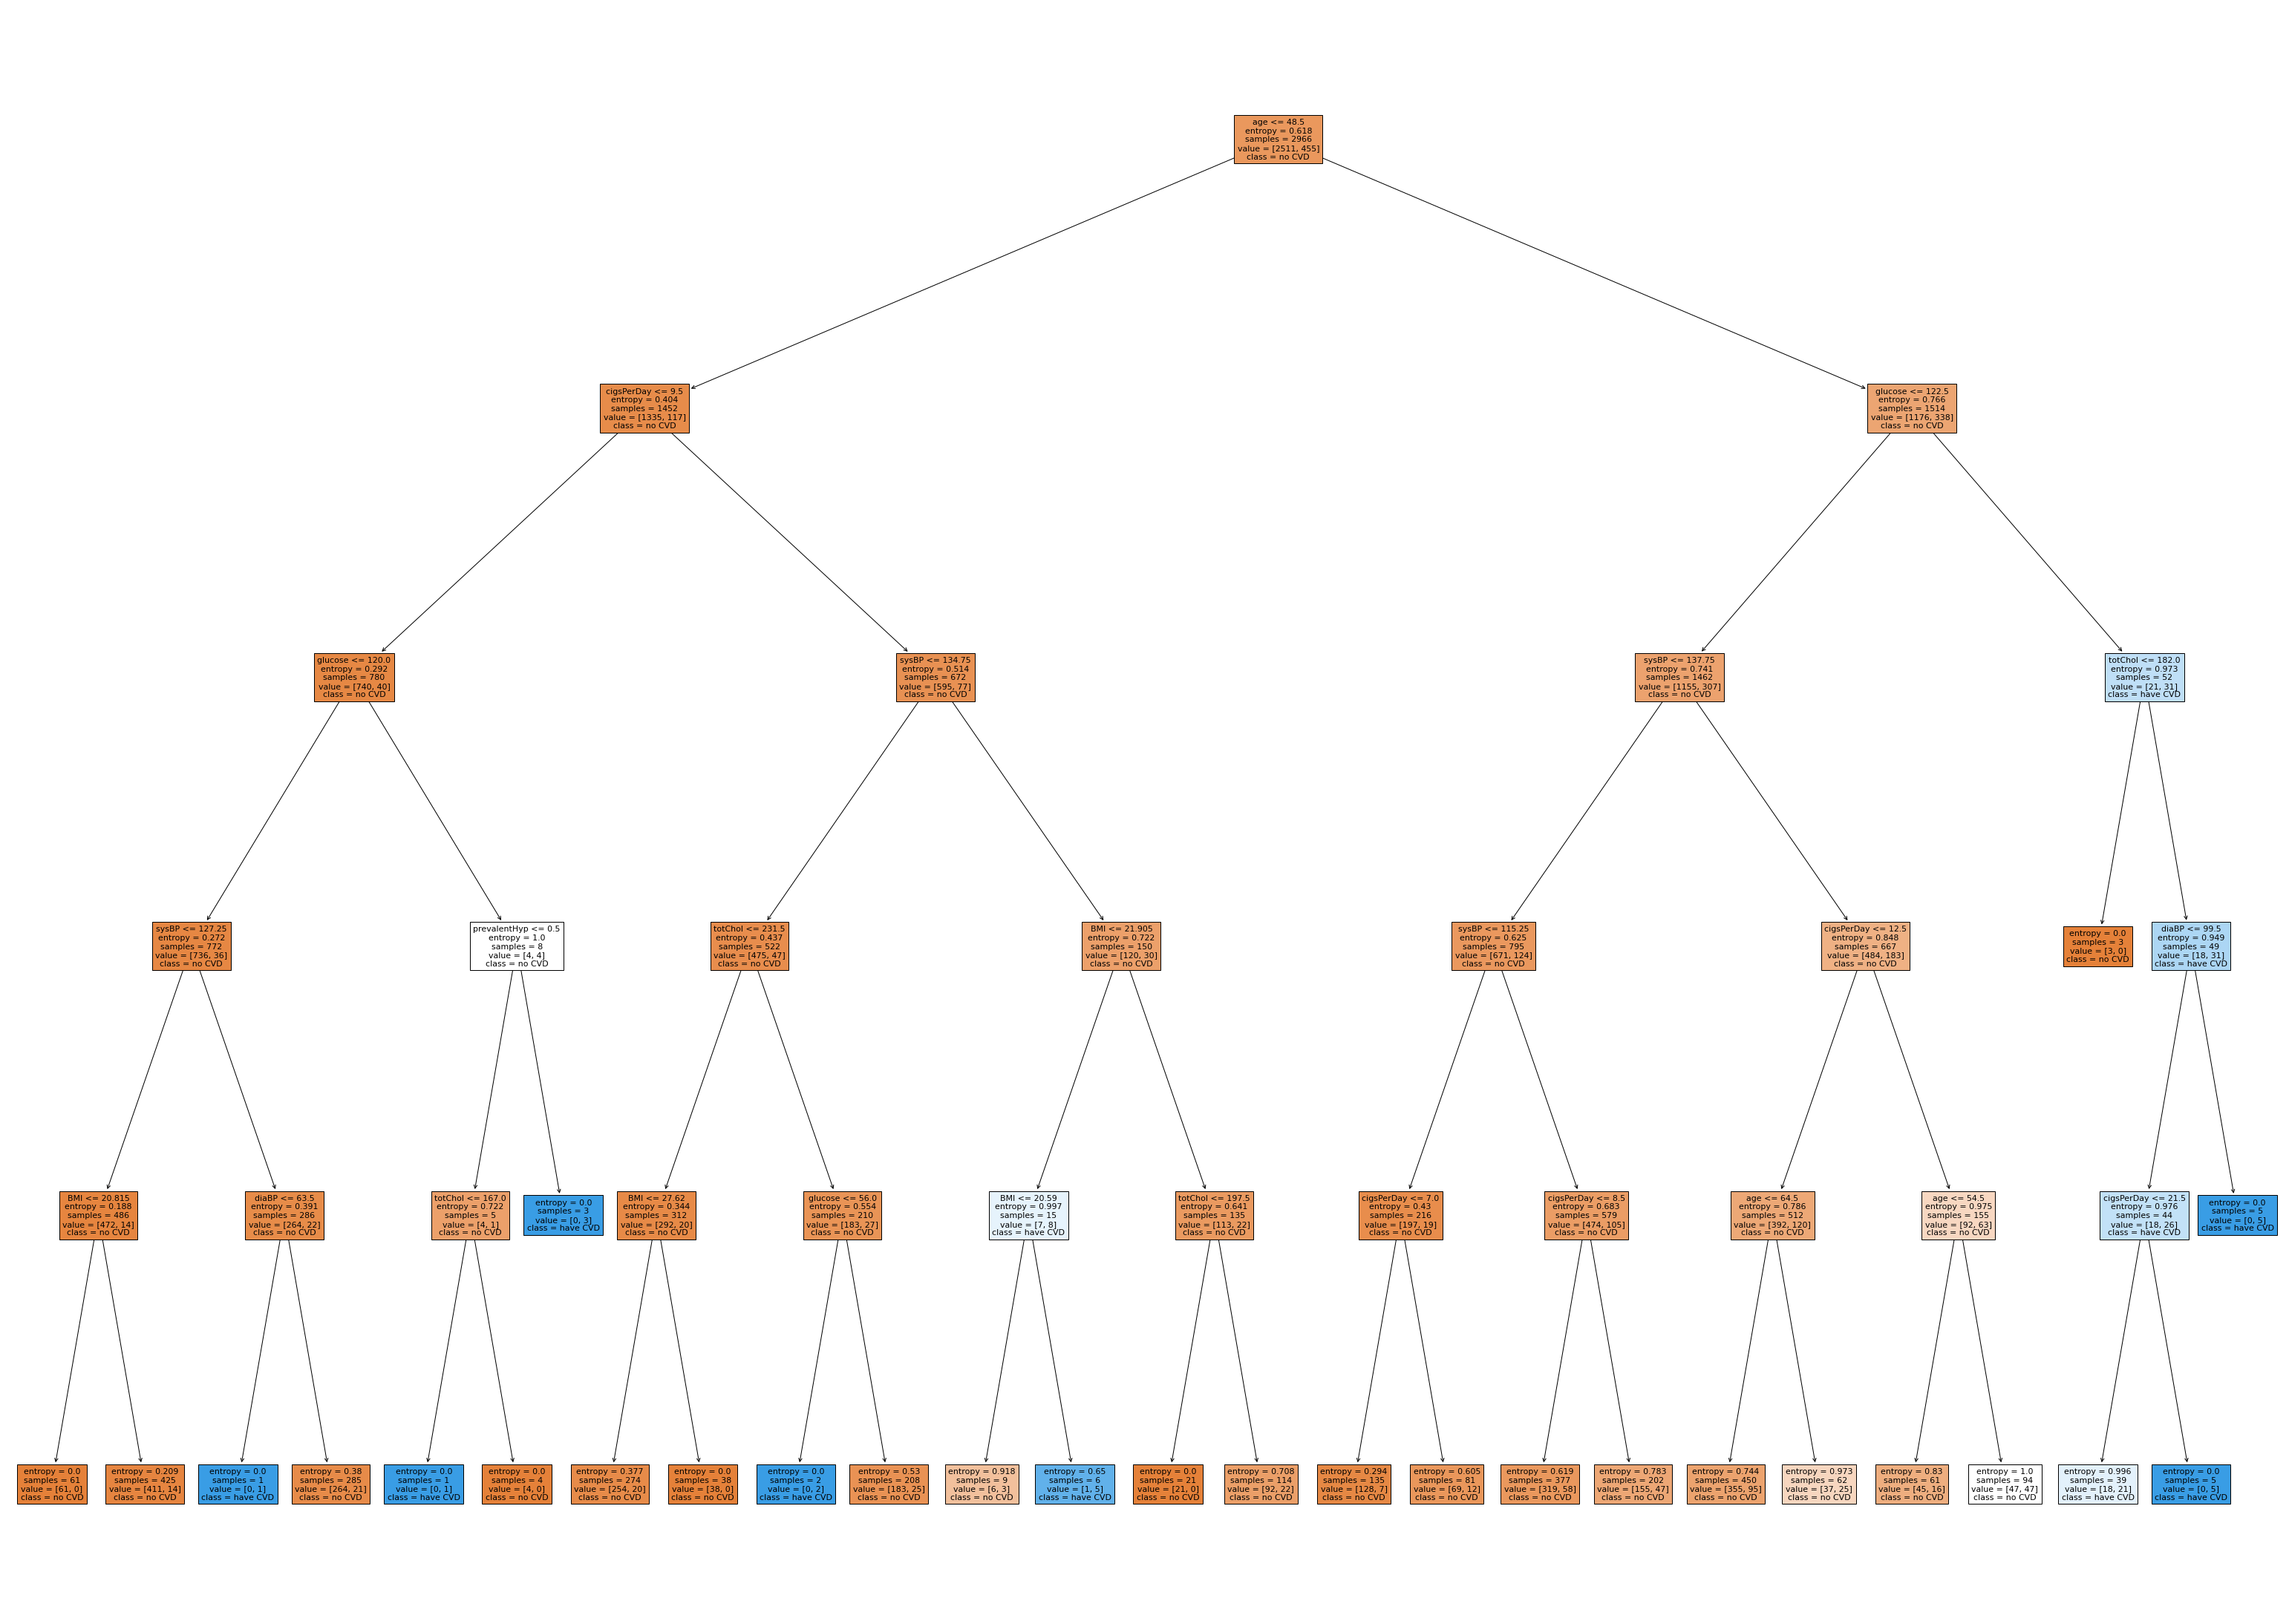

In [93]:
fig=plt.figure(figsize=(55,40))
_=tree.plot_tree(sk_tree,feature_names=['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'],class_names=["no CVD","have CVD"],filled=True)


### accuracy when 'Over-fitting' exists(no max_depth restriction)

In [130]:
# no restriction on "max_depth" 
sk_tree=DecisionTreeClassifier(criterion='entropy')

In [131]:

sk_tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [132]:
acc1=sk_tree.score(X_train,Y_train)*100
print("accuracy on test data= ",acc1," %")

accuracy on test data=  100.0  %


In [133]:
acc=sk_tree.score(X_test,Y_test)*100
print("accuracy on test data= ",acc," %")

accuracy on test data=  75.0  %


## when over-fiting exists, testing accuracy is very small, compared to training accuracy

# Random Forest using SK-learn

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)

In [17]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [18]:
rf.score(X_train,Y_train)

0.8540121375590021

In [19]:
rf.score(X_test,Y_test)

0.8522012578616353

In [ ]:
#testing accuracy is higher than training accuracy

# geting Accuracy,   using 'cross-validation'

In [135]:
from sklearn.model_selection import cross_val_score


In [140]:
#cross validation=cv=5
# dividing training set into 5 parts, using any 4 parts for training, then testing on the 5th part
#all combinations of 4 parts will be taken, and tested on the 5th
acc=cross_val_score(RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5),X_train,Y_train,cv=5  )
acc

array([0.84175084, 0.846543  , 0.84822934, 0.84485666, 0.84317032])

In [143]:
#we take mean of these 
acc=np.mean(acc)
print("cross validation accuracy\nOf random forest classifier = ",acc*100)

cross validation accuracy
Of random forest classifier =  84.49100334429171


# Hyper Tuning the "no. of tress" used in Random Forest Classifier

### n_estimator=no of trees 

In [145]:
acc_list=[]
for i in range(1,50):
    acc=cross_val_score(RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=5),X_train,Y_train,cv=5  ).mean()
    acc_list.append(acc)
print(acc_list)

[0.8476070428852891, 0.8445727653147552, 0.8462596737470263, 0.8455840019077794, 0.8462602415384877, 0.8462608093299492, 0.8465963740837266, 0.845924108993249, 0.8472697747571273, 0.845585705282164, 0.8472714781315119, 0.8462591059555647, 0.8472709103400502, 0.8445744686891399, 0.8452473015710791, 0.8455845696992409, 0.8462596737470263, 0.845248437154002, 0.8476076106767507, 0.8455840019077794, 0.8476081784682122, 0.8442360649780548, 0.8479460143878356, 0.8462596737470263, 0.8462596737470263, 0.8435609609302694, 0.8472709103400504, 0.8469330744204269, 0.8452478693625405, 0.8455868408650871, 0.8465946707093419, 0.8455851374907024, 0.8465975096666496, 0.8452495727369251, 0.8452473015710791, 0.8462591059555647, 0.8449117368173017, 0.848281579141613, 0.8479448788049126, 0.8455851374907024, 0.8455851374907025, 0.8462591059555647, 0.8462579703726416, 0.8445744686891399, 0.846935345586273, 0.8462602415384877, 0.8462596737470263, 0.8449111690258402, 0.8459218378274027]


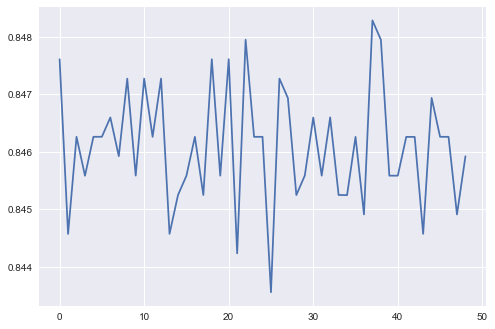

In [147]:
plt.style.use("seaborn")
plt.plot(acc_list)


In [148]:
print("max accracy occurs at n_estimator=",np.argmax(acc_list))

max accracy occurs at n_estimator= 37


In [161]:
print("max cross validation accuracy with\nrandom forest classifier on training data=",acc_list[37]*100," %")

max cross validation accuracy with
random forest classifier on training data= 84.8281579141613  %


## finding score on test data , with n_estimator=37

In [20]:
rf=RandomForestClassifier(n_estimators=37,criterion='entropy',max_depth=5)

In [21]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=37)

In [22]:
rf.score(X_test,Y_test)*100

85.22012578616352

In [17]:
Y_rf_pred=rf.predict?

In [23]:
Y_rf_pred=rf.predict(X_test)

###  measuring performance by evaluating parameters

In [24]:
def evaluateParameters(Y_pred,Y_test):
    tp,tn,fp,fn=0,0,0,0
    for i in range(len(Y_test)):
        actual=Y_test[i]
        if(actual==1):
            if(actual==Y_pred[i]):
                tp+=1
            else:
                fn+=1
        else:
            if(actual==Y_pred[i]):
                tn+=1
            else:
                fp+=1
    print("\naccuracy= ",(tp+tn)/(tp+tn+fn+fp))
    print("\nsensitivity= ",tp/(tp+fn))
    print("\nspecificity= ",tn/(fp+tn))
    print("\nPPv= ",tp/(tp+fp))
    print("\nNPV= ",tn/(tn+fn))
    
            
            

In [25]:
evaluateParameters(Y_rf_pred,Y_test)


accuracy=  0.8522012578616353

sensitivity=  0.015873015873015872

specificity=  0.9981532779316713

PPv=  0.6

NPV=  0.8531965272296764


# saving trained model, for deploying on web

In [26]:
import pickle

In [27]:
with open('rf_model.pkl','wb') as f:
    pickle.dump(rf,f)